<a href="https://colab.research.google.com/github/sonu6084/SHALA2020/blob/master/8.Assignment_ML_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Linear Regression(SGD)**



---
Importing the required packages


---



In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import california_housing
from sklearn.metrics import mean_squared_error
from scipy import stats
import seaborn as sns;
import random

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.california_housing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)




---
Using the same dataset **california_housing** try to find the best fit of the dataset by implementing stocastic gradient descent from scratch. 


---



In [0]:
housing_data = california_housing.fetch_california_housing()

In [0]:
Features = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
Target = pd.DataFrame(housing_data.target, columns=['Target'])
df = Features.join(Target)

In [0]:
df = df[df.Target < 5]

In [0]:
X = df.MedInc
y = df.Target

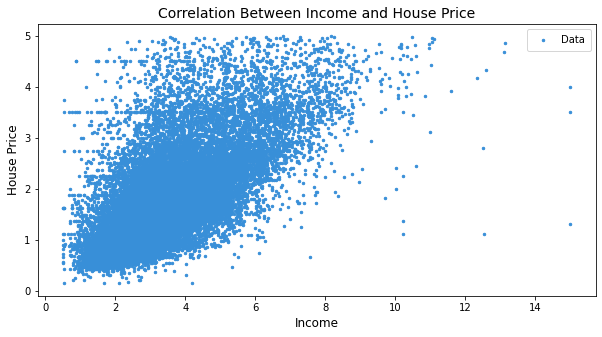

In [0]:
plt.figure(figsize=(10,5))
plt.scatter(X, y, label='Data', c='#388fd8', s=6)
plt.title('Correlation Between Income and House Price', fontSize=14)
plt.xlabel('Income', fontSize=12)
plt.ylabel('House Price', fontSize=12)
plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)
plt.show()

In [0]:
def SGD(X,y,lr = 0.01,epochs=100,batch_size = 1):
  ################################################
  ####write your code here######################## 
  m , b = 0.1, 0.1
  mse = []
  N = len(X)
  for t in range(epochs):
    indexes = np.random.randint(0,N,batch_size) 
    Xs = np.take(X,indexes)
    ys = np.take(y,indexes)
    Ns = len(Xs)
    
    f = ys - (m*Xs + b)

    m = m - lr * ( -1* Xs.dot(f).sum() / Ns)
    b = b - lr * ( -1* f.sum() / Ns)

    mse.append(mean_squared_error(y,(m*X+b)))
  #################################################       
    
  return m, b, mse

In [0]:

m, b,  mse = SGD(X, y, lr=0.01, epochs=100, batch_size=2)

In [0]:
X.shape

(19648,)

Plot the SGD curve(MSE against the epochs), and the line which represents the best fit of the given dataset.

MSE: 0.560516889245366


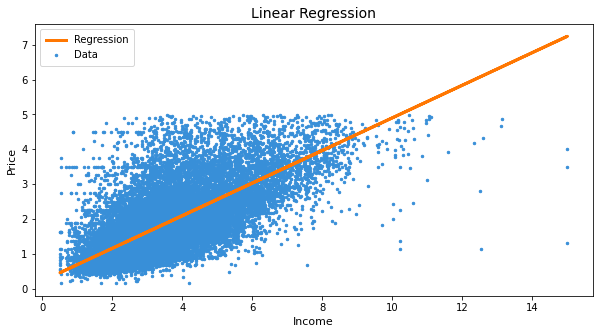

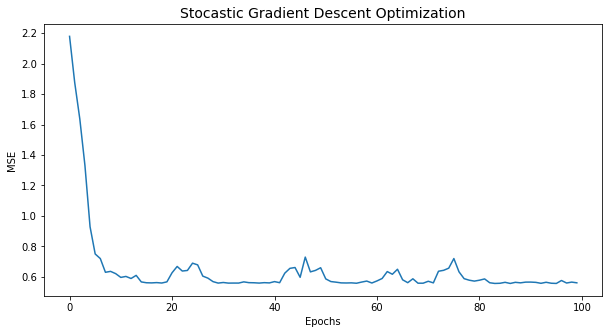

In [0]:
X = df.MedInc
y = df.Target

m, b, mse = SGD(X, y, lr=0.01, epochs=100,batch_size = 2)

y_pred = m*X + b

print("MSE:",mean_squared_error(y, y_pred))

plt.figure(figsize=(10,5))
plt.scatter(X, y, label='Data', c='#388fd8', s=6)
plt.plot(X, y_pred, c='#ff7702', lw=3, label='Regression')
plt.title('Linear Regression', fontSize=14)
plt.xlabel('Income', fontSize=11)
plt.ylabel('Price', fontSize=11)
plt.legend( loc=0, fontsize=10, borderpad=.6)
plt.show()



plt.figure(figsize=(10,5))
plt.plot(range(len(mse)), mse)
plt.title('Stocastic Gradient Descent Optimization', fontSize=14)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

#**SVM**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import random
from numpy import linalg as LA



---


**Generating Random linearly separable data**


---



In [0]:
data = [[np.random.rand(), np.random.rand()] for i in range(10)]
for i, point in enumerate(data):
  x, y = point
  if 0.5*x - y + 0.25 > 0:
    data[i].append(-1)
  else:
    data[i].append(1)

In [62]:
data

[[0.775498831891113, 0.8347269689681918, 1],
 [0.055847525473325055, 0.03159776449945728, -1],
 [0.19513665784620104, 0.6456332236385427, 1],
 [0.707316049821512, 0.9542374414416183, 1],
 [0.8905000162963435, 0.6712591279665825, -1],
 [0.44826734964751735, 0.38834099876494876, -1],
 [0.9053718281850722, 0.9881194320137913, 1],
 [0.8778376099622165, 0.7834522435554305, 1],
 [0.14421490880305687, 0.45559707809433236, 1],
 [0.0988602679278201, 0.9106521507975223, 1]]



---


**Visualizing the above data**


---



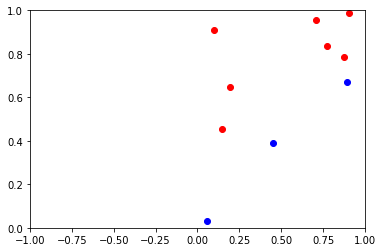

In [63]:
for x, y, l in data:
  if l == 1: 
    clr = 'red'
  else: 
    clr = 'blue'
  plt.scatter(x, y, c=clr)
  plt.xlim(-1,1)
  plt.ylim(0,1)



---


**Train a SVM classifier using gradient descent and return a Weight Matrix which is a numpy array of length (N + 1) where N is dimension of training samples. You can refer to Fig. 1 in [this](https://www.cs.huji.ac.il/~shais/papers/ShalevSiSrCo10.pdf) paper for implementation. You can add arguments to svm_function according to your implementation.**


---



In [0]:
def svm_function(x, y, epoch, l_rate):
  
  l = 1/epoch
  
  X1 = np.zeros((x.shape[0],x.shape[1]+1))
  X1[:,1:] = x[:,:2]
  X1[:,0] +=1.0
  print(X1.shape)
  w = np.zeros(X1.shape[1])
  N = len(y)
  for _ in range(epoch):
    for i , value in enumerate(X1):
      
      f = y[i]*np.dot(X1[i],w)
      if f < 1:
        w = w -  l_rate*((l*w - (y[i]*X1[i])))
      else:
        w = w - l_rate*l*w
  return w



---


**Run SVM Classifier**


---



In [104]:
data = np.asarray(data)
X = data[:,:2]
Y = data[:,2]
w = svm_function(X, Y, 10000, 1)

(10, 3)


In [105]:
w

array([-5.8858447 , -8.20379765, 18.03971768])

In [114]:
xtest = np.zeros((X.shape[0],X.shape[1]+1))
xtest[:,1:] = X[:,:2]
xtest[:,0] +=1.0

predi = []
for i,v in enumerate(xtest):
  predi.append(np.dot(xtest[i],w))

p = []
for i in predi:
  if i >0 :
    p.append(1.)
  else:
    p.append(-1.)

print(p)
print(Y)

[1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0]
[ 1. -1.  1.  1. -1. -1.  1.  1.  1.  1.]


# **Visualize the classifier**


---

Write a code to draw a lines corrosponding to 'w' vector you got as output from svm_function and for a line from which actual data was generated (0.5*x - y + 0.25). 

---



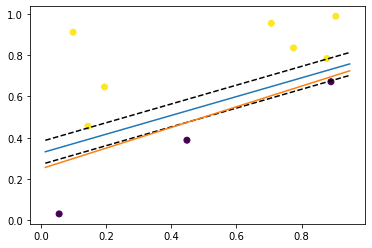

In [110]:
xtest = np.zeros((X.shape[0],X.shape[1]+1))
xtest[:,1:] = X[:,:2]
xtest[:,0] +=1.0
plt.scatter(xtest[:,1],xtest[:,2],c=Y)
ax = plt.gca()
xlim = ax.get_xlim()
xx = np.linspace(xlim[0],xlim[1])
yy = (-w[1] * xx -w[0]-0) / w[2]
plt.plot(xx,yy,label="SVM Boundary")
yy = (-w[1] * xx -w[0]-1) / w[2]
plt.plot(xx,yy,"k--",label="Boundary lines touching support vectors")
yy = (-w[1] * xx -w[0]+1) / w[2]
plt.plot(xx,yy,"k--")
yy = 0.5*xx +0.25
plt.plot(xx,yy,label="Original model")